<a href="https://colab.research.google.com/github/Barbab1/finance-forecast/blob/main/IncomeStatement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tabulate import tabulate
import numpy as np

## Assumptions
# Revenue
Units_Sold        = [5000, 5500, 6500, 8000, 10000]
Price             = 5
Discount          = 0.05
Depreciation      = - np.array([4952.38, 4952.38, 4952.38, 4952.38, 2952.38])
Interest_Expense  = - np.array([911.45, 630.00, 927.50, 875.00, 822.50])

# COGS as % of Revenue
Raw_Materials     = 0.30
Fulfillment       = 0.07
Transaction_Fees  = 0.02

# Operating Expenses as % of Revenue
Labor     = 0.15
Marketing = 0.05
SGA       = 0.05

# Tax Rate as % of Revenue
Tax_Rate = 0.21

# Forecasting Horizon
Yrs_Ahead = 5

################################################################################

# Income Statement
Gross_Revenue = np.array(Units_Sold) * Price
Discounts     = np.array(Gross_Revenue) * - Discount
Net_Revenue   = Gross_Revenue + Discounts
Total_COGS = (
    np.array(Gross_Revenue) * -Raw_Materials +
    np.array(Gross_Revenue) * -Fulfillment +
    np.array(Gross_Revenue) * -Transaction_Fees
)
Gross_Profit = Net_Revenue + Total_COGS
Total_OpEx   = (
    np.array(Gross_Revenue) * - Labor +
    np.array(Gross_Revenue) * - Marketing +
    np.array(Gross_Revenue) * - SGA
)
EBITDA       = Gross_Profit + Total_OpEx
EBIT         = EBITDA + Depreciation
EBT          = EBIT + Interest_Expense
Tax_Expense  = np.where(EBT > 0, - Tax_Rate * EBT, 0)
Net_Income   = EBT + Tax_Expense

# Create a table with columns for the years and rows for the variables
table_data = [
    ["Variable", "Year 1", "Year 2", "Year 3", "Year 4", "Year 5"],
    ["Gross Revenue"] + ["{:.2f} €".format(val) for val in Gross_Revenue],
    ["Discounts"] + ["({:.2f}) €".format(abs(val)) if val < 0 else "{:.2f} €".format(val) for val in Discounts],
    ["Net Revenue"] + ["({:.2f}) €".format(abs(val)) if val < 0 else "{:.2f} €".format(val) for val in Net_Revenue],
    ["Total COGS"] + ["({:.2f}) €".format(abs(val)) if val < 0 else "{:.2f} €".format(val) for val in Total_COGS],
    ["Gross Profit"] + ["({:.2f}) €".format(abs(val)) if val < 0 else "{:.2f} €".format(val) for val in Gross_Profit],
    ["Total OpEx"] + ["({:.2f}) €".format(abs(val)) if val < 0 else "{:.2f} €".format(val) for val in Total_OpEx],
    ["EBITDA"] + ["({:.2f}) €".format(abs(val)) if val < 0 else "{:.2f} €".format(val) for val in EBITDA],
    ["Depreciation"] + ["({:.2f}) €".format(abs(val)) if val < 0 else "{:.2f} €".format(val) for val in Depreciation],
    ["EBIT"] + ["({:.2f}) €".format(abs(val)) if val < 0 else "{:.2f} €".format(val) for val in EBIT],
    ["Interest Expense"] + ["({:.2f}) €".format(abs(val)) if val < 0 else "{:.2f} €".format(val) for val in Interest_Expense],
    ["EBT"] + ["({:.2f}) €".format(abs(val)) if val < 0 else "{:.2f} €".format(val) for val in EBT],
    ["Tax Expense"] + ["({:.2f}) €".format(abs(val)) if val < 0 else "{:.2f} €".format(val) for val in Tax_Expense],
    ["Net Income"] + ["({:.2f}) €".format(abs(val)) if val < 0 else "{:.2f} €".format(val) for val in Net_Income]
]

# Print the table
print(tabulate(table_data, tablefmt="grid"))

+------------------+-------------+--------------+--------------+--------------+--------------+
| Variable         | Year 1      | Year 2       | Year 3       | Year 4       | Year 5       |
+------------------+-------------+--------------+--------------+--------------+--------------+
| Gross Revenue    | 25000.00 €  | 27500.00 €   | 32500.00 €   | 40000.00 €   | 50000.00 €   |
+------------------+-------------+--------------+--------------+--------------+--------------+
| Discounts        | (1250.00) € | (1375.00) €  | (1625.00) €  | (2000.00) €  | (2500.00) €  |
+------------------+-------------+--------------+--------------+--------------+--------------+
| Net Revenue      | 23750.00 €  | 26125.00 €   | 30875.00 €   | 38000.00 €   | 47500.00 €   |
+------------------+-------------+--------------+--------------+--------------+--------------+
| Total COGS       | (9750.00) € | (10725.00) € | (12675.00) € | (15600.00) € | (19500.00) € |
+------------------+-------------+--------------+-

In [ ]:
def calculate_net_income(gross_revenue):
    discounts = np.array(gross_revenue) * - Discount
    net_revenue = gross_revenue + discounts
    total_cogs = (
        np.array(gross_revenue) * - Raw_Materials +
        np.array(gross_revenue) * - Fulfillment +
        np.array(gross_revenue) * - Transaction_Fees
    )
    gross_profit = net_revenue + total_cogs
    total_opex = (
        np.array(gross_revenue) * - Labor +
        np.array(gross_revenue) * - Marketing +
        np.array(gross_revenue) * - SGA
    )
    ebitda = gross_profit + total_opex
    ebit = ebitda + Depreciation
    ebt = ebit + Interest_Expense
    tax_expense = np.where(ebt > 0, - Tax_Rate * ebt, 0)
    net_income = ebt + tax_expense
    return net_income

calculate_net_income(Gross_Revenue)

array([1490.0743, 2324.6698, 3314.1448, 5192.3698, 9262.8448])

In [ ]:
# Number of Simulations
num_simulations = 10000

# Initialize a 2D NumPy array to store the results
result_table = np.zeros((num_simulations, Yrs_Ahead))

# Monte Carlo Simulations for each year
for year in range(Yrs_Ahead):
    # Define the Mean and the Std for the specific year
    revenue_mean = Gross_Revenue[year]
    revenue_std = 5000

    # Monte Carlo Simulations for the specific year
    for simulation in range(num_simulations):
        # Sample Gross_Revenue from Normal Distribution
        sampled_revenue = np.random.normal(revenue_mean, revenue_std)

        # Get the Net Income for the specific year
        sampled_net_income = calculate_net_income(sampled_revenue)

        # Store the sampled_net_income in the result array
        result_table[simulation, year] = sampled_net_income[year]

median_net_income = np.median(result_table, axis=0)
std_dev_net_income = np.std(result_table, axis=0)
percentile_10th = np.percentile(result_table, 10, axis=0)
percentile_90th = np.percentile(result_table, 90, axis=0)

# Initialize a list to store the data for the table
result_data = []

# Append the results for each year to the result_data
for year in range(Yrs_Ahead):
    result_data.append([
        f"Year {year + 1}",
        "({:.2f}) €".format(abs(median_net_income[year])) if median_net_income[year] < 0 else "{:.2f} €".format(median_net_income[year]),
        "({:.2f}) €".format(abs(std_dev_net_income[year])) if std_dev_net_income[year] < 0 else "{:.2f} €".format(std_dev_net_income[year]),
        "({:.2f}) €".format(abs(percentile_10th[year])) if percentile_10th[year] < 0 else "{:.2f} €".format(percentile_10th[year]),
        "({:.2f}) €".format(abs(percentile_90th[year])) if percentile_90th[year] < 0 else "{:.2f} €".format(percentile_90th[year])
    ])

# Print the result table
header = ["Year", "Median Net Income", "Standard Deviation", "10th Percentile", "90th Percentile"]
print(tabulate(result_data, headers = header, tablefmt="grid"))

print()

+--------+---------------------+----------------------+-------------------+-------------------+
| Year   | Median Net Income   | Standard Deviation   | 10th Percentile   | 90th Percentile   |
+========+=====================+======================+===================+===================+
| Year 1 | 1468.86 €           | 1250.91 €            | (104.14) €        | 3045.21 €         |
+--------+---------------------+----------------------+-------------------+-------------------+
| Year 2 | 2345.00 €           | 1224.28 €            | 745.93 €          | 3891.66 €         |
+--------+---------------------+----------------------+-------------------+-------------------+
| Year 3 | 3306.81 €           | 1245.56 €            | 1714.70 €         | 4916.05 €         |
+--------+---------------------+----------------------+-------------------+-------------------+
| Year 4 | 5209.59 €           | 1232.55 €            | 3626.84 €         | 6792.55 €         |
+--------+---------------------+--------

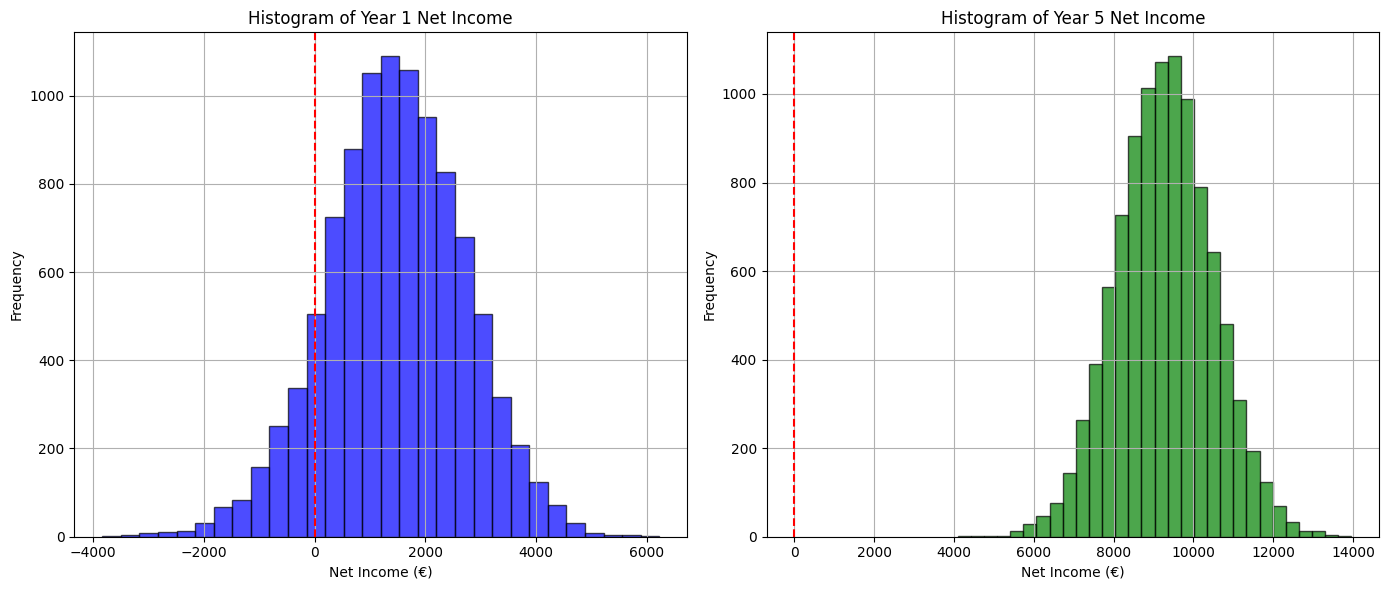

In [ ]:
import matplotlib.pyplot as plt

# Specify the years for the histograms
first_year = 0
last_year = Yrs_Ahead - 1

# Extract net income values for the specified years
net_income_first_year = result_table[:, first_year]
net_income_last_year = result_table[:, last_year]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for the first year net income
ax1.hist(net_income_first_year, bins=30, color='blue', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Net Income (€)')
ax1.set_ylabel('Frequency')
ax1.set_title(f'Histogram of Year {first_year + 1} Net Income')
ax1.grid(True)

# Add a vertical red line at the point where net income is zero in the first histogram
ax1.axvline(x=0, color='red', linestyle='--', label='Net Income = 0')

# Plot histogram for the last year net income
ax2.hist(net_income_last_year, bins=30, color='green', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Net Income (€)')
ax2.set_ylabel('Frequency')
ax2.set_title(f'Histogram of Year {last_year + 1} Net Income')
ax2.grid(True)

# Add a vertical red line at the point where net income is zero in the second histogram
ax2.axvline(x=0, color='red', linestyle='--', label='Net Income = 0')

# Adjust layout for better spacing
plt.tight_layout()

# Show the subplots
plt.show()

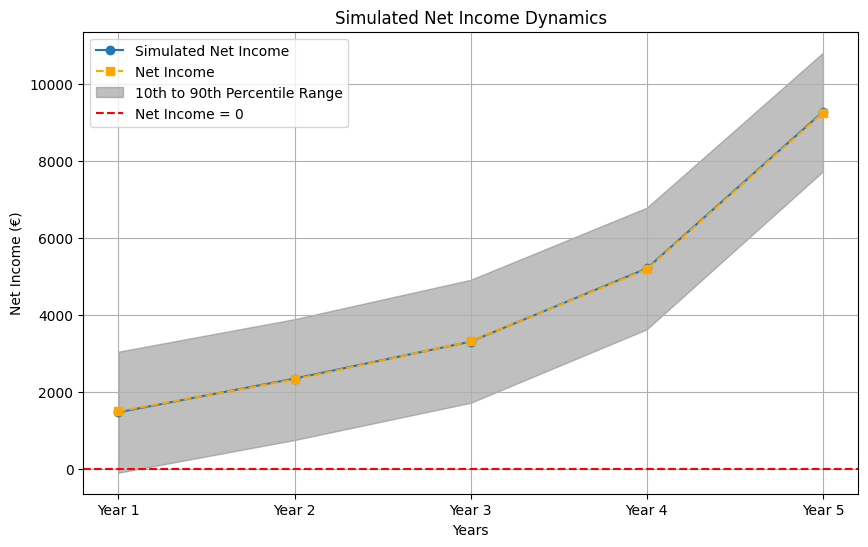

In [ ]:
# Define the x-axis labels
x_labels = [f'Year {i + 1}' for i in range(Yrs_Ahead)]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(range(Yrs_Ahead), median_net_income, label="Simulated Net Income", marker='o', linestyle='-')
plt.plot(range(Yrs_Ahead), Net_Income, label="Net Income", marker='s', linestyle='--', color='orange')
plt.fill_between(range(Yrs_Ahead), percentile_10th, percentile_90th, color='gray', alpha=0.5, label='10th to 90th Percentile Range')

# Set the x-axis labels
plt.xticks(range(Yrs_Ahead), x_labels)

# Add a horizontal line at a specific y-value (e.g., y=0)
plt.axhline(y=0, color='red', linestyle='--', label='Net Income = 0')

plt.xlabel('Years')
plt.ylabel('Net Income (€)')
plt.title('Simulated Net Income Dynamics')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

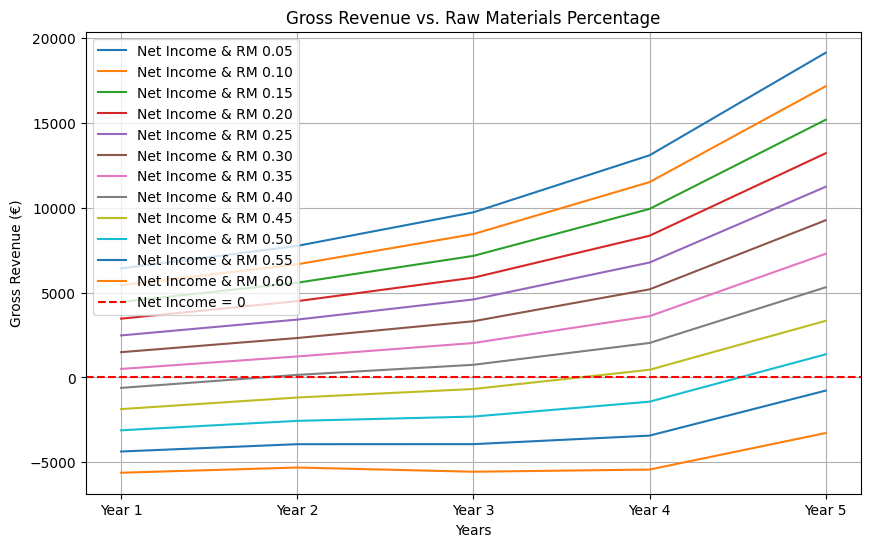

In [ ]:
# Define the range of Raw Materials percentages
raw_materials_range = np.arange(0.05, 0.65, 0.05)

# Initialize lists to store the results
net_income_values = []

# Calculate Gross Revenue for each Raw Materials percentage
for raw_materials_percentage in raw_materials_range:
    # Update the Raw Materials percentage
    Raw_Materials = raw_materials_percentage

    # Recalculate Gross Revenue
    net_income_new = calculate_net_income(Gross_Revenue)

    # Append the Gross Revenue to the list
    net_income_values.append(net_income_new)

# Define the x-axis labels
x_labels = [f'Year {i + 1}' for i in range(Yrs_Ahead)]

# Create the plot
plt.figure(figsize=(10, 6))
for i, raw_materials_percentage in enumerate(raw_materials_range):
    plt.plot(range(Yrs_Ahead), net_income_values[i], label=f'Net Income & RM {raw_materials_percentage:.2f}')

# Set the x-axis labels
plt.xticks(range(Yrs_Ahead), x_labels)

# Add a horizontal line at a specific y-value (e.g., y=0)
plt.axhline(y=0, color='red', linestyle='--', label='Net Income = 0')

plt.xlabel('Years')
plt.ylabel('Gross Revenue (€)')
plt.title('Gross Revenue vs. Raw Materials Percentage')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()